In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from IPython.display import Image 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Green Taxi Overview

**What are those green cabs?**
Created in 1897, the Yellow Cabs are a part of New York. But since 2013, a new category of taxis appeared in New York, the so called Boro Taxis.
Alike the traditional taxis of NY, the Boro Taxis are part of the NYC Taxi & Limousine Commission. 
The purpose of the Boro Taxi is to improve transportation in the 5 boroughs of NY, in particular out of Manhattan. The improvements also aim at offering a better service for people with disabilities.

**What are the differences between the green and yellow cabs?**
The Boro Taxis can only pick up passengers from the streets in northern Manhattan (north of West 110th Street and East 96th Street), and anywhere else in the 4 boroughs (except the airport area). 
They can drop you off anywhere (including the airport area) in the 5 boroughs.


**Conclusion**
Those green cabs are more than useful. If you are in Brooklyn or the Bronx it’s now stress-free to find an available cab. The traditional yellow cabs rather stay in the street of Manhattan and it was challenging to find a taxi to go to the other boroughs.
Thanks to the green cabs, the New Yorkers and tourist’s taxi rides are easier!
<br>
From https://www.new-york-city-travel-tips.com/green-cab-new-york-boro-taxi/

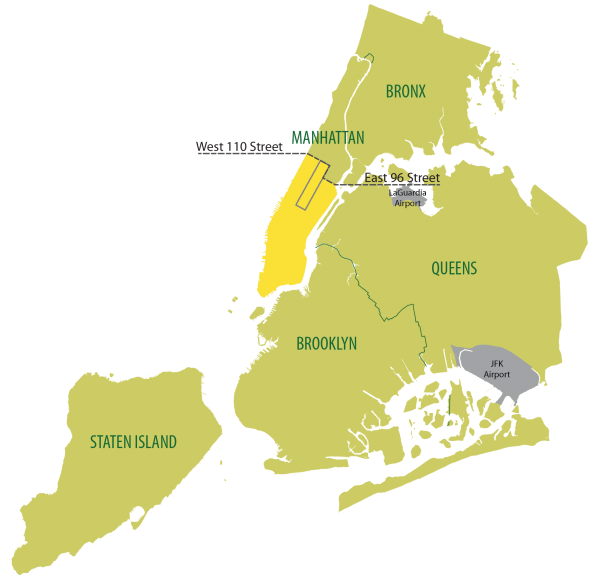

In [2]:
Image(filename='GreenTaxi.png')

# Problem Statement


## Regression -predict green taxi fare amount in New York
**Gain  insights on the parameters that affect the total amount of taxi fare of green taxi's in New York according to various parameters and build a model that predicts the total amount of the ride:** <br>

My assumption is that diffrent criteria's types affect the total amount of taxi fare:<br>

<br>
- When the ride is during rush hours-> the amount will be higher?
<br>
- When the ride is during the night-> the amount will be higher?
<br>
- When the ride is during weekend-> the amount will be higher?
<br>
- How payment type affects the total amount?If I will pay in cash/credit how it will affect the total amount?
<br>
- How the trip type will affect the total amount? If my drive is from the airport,how it will affect the total amount?
<br>
- How the total passengers will affect the total amount? Does more passengers affect the total amount?
<br>
- How the weather conditions will affect the total amount? If it snows or rains  the total amount will be higher
<br>
- and more...
<br>

**Or Maybe just the total duration of trip and total distance of the trip affect the amount ,and all other parameters don't have extra affect on the total amount?** <br>

### work flow
1. Reading the Datasets

1. Data cleaning
2. Feature Engineering
3. Exploratory data analysis
4. Feature engineering
5. Split data to Train, Test & Validation sets
6. Sanity check between full data to train set
7. compare all features combinations on simple linear regression models on valid set -->choosing the features for model
8. compare RandomForestRegressor model with selected features from step 7 
9. Predict+Evaluate on test set with chosen model




#  The Data 

 * **2016_Green_Taxi_Trip_Data.csv** - contains trip records from all trips completed in green taxis in NYC in 2016 <br> https://catalog.data.gov/dataset/2016-green-taxi-trip-data
 * **New_York_Weather_2016.csv**- New York 2016 Hourly Weather Data  <br> https://www.kaggle.com/meinertsen/new-york-city-taxi-trip-hourly-weather-data

# Data dictionary 
* **RATECODE_ID**- The final rate code in effect at the end of the trip (Standard rate,JFK,Newark,Nassau or Westchester,Negotiated fare,Group ride)
* **PASSENGER_COUNT**- The number of passengers in the vehicle
* **TRIP_DISTANCE**- The elapsed trip distance in KM reported by the taximeter
* **TIP_AMOUNT**- Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
* **TOTAL_AMOUNT**- The total amount charged to passengers. Does not include cash tips.
* **PAYMENT_TYPE**- how the passenger paid for the trip (Credit Card,Cash)
* **TRIP_TYPE**- A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver (Street-hail,Dispatch)
* **PICKUP_MONTH**- Month of trip ride (1-12)
* **PICKUP_DAY_OF_MONTH**-  Day of Month of trip ride (1-31)
* **PICKUP_HOUR**- Hour of trip ride (0-23)
* **PICKUP_DAY_OF_WEEK**- Day of week of ride 
* **IS_WEEK_END**- indicates if a weekend ride (1 - for weekend friday or sunday,0- otherwise)
* **TRIP_MINUTES**- Total trip minutes of ride
* **DOLLARS_PER_MINUTE**- dollars per minute
* **IS_RUSH_HOURS**- indicates if a rush hour ride (1 - yes hours 16-20  ,0- otherwise)
* **IS_NIGHT_HOURS**- indicates if a nigh hour ride (1 - yes hours 20-6  ,0- otherwise)
* **IS_AIRPORT_TRIP**- indicates if a airport ride (1 - yes ,0- otherwise)
* **IS_CREDIT**- indicates if payment type is credit (1 - yes ,0- cash)
* **IS_STREETHAIL**- indicates if trip type is street hail type trip (1 - yes ,0- dispatch)
* **TIP_PCT**- tip pct out of total amount
* **DID_GAVE_TIP**- indicates if passenger gave tip
* **WEATHER**- weather on the drive (reg,rain,snow)




# Reading the Datasets

In [3]:
#reading taxi df
df_taxi= pd.read_csv('2016_Green_Taxi_Trip_Data.csv')
#reading weather df
df_weather= pd.read_csv('New_York_Weather_2016.csv',parse_dates=['pickup_datetime'],usecols=["pickup_datetime","icon"])


In [4]:
df_taxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'PULocationID',
       'DOLocationID'],
      dtype='object')

# Data Cleaning

**1.Removing Columns with large amount of missing data -** <br> PICKUP_LONGITUDE,PICKUP_LATITUDE,DROPOFF_LONGITUDE,DROPOFF_LATITUDE,EHAIL_FEE,PULOCATIONID,DOLOCATIONID<br>
**2.Removing records where TRIP_TYPE is na** <br> 
**3.Removing records with invalid data-** <br> 
TRIP_DISTANCE<=0,TIP_AMOUNT<0,TOTAL_AMOUNT<0 (prize starting from 2.5 dollars),PASSENGER_COUNT=0<br> 
**4.Removing records with outliers-** <br>
TRIP_MINUTES>80,TOTAL_AMOUNT>70,RATECODE_ID=99,RATECODE_ID=6,PASSENGER_COUNT>6<br> 
**5.Removing Columns that are not relevant for prediction-** <br> 
FARE_AMOUNT,EXTRA,MTA_TAX,TOLLS_AMOUNT,IMPROVEMENT_SURCHARGE <br>
**6.Removing duplicate weather records-** <br> 
we want 1 record per day,month,hour-recognized some duplicates<br> 
**7.Removing unknown weather records-** <br> 


### Data Cleaning- New York Taxi

In [5]:
dfColumns=[col.strip().upper() for col in df_taxi.columns]
df_taxi.columns=dfColumns
print("Green Taxi DF with NA values:")
print(df_taxi.columns[df_taxi.isna().any()].tolist())

Green Taxi DF with NA values:
['PICKUP_LONGITUDE', 'PICKUP_LATITUDE', 'DROPOFF_LONGITUDE', 'DROPOFF_LATITUDE', 'EHAIL_FEE', 'TRIP_TYPE', 'PULOCATIONID', 'DOLOCATIONID']


In [6]:
print("Counting NA values per recognized columns with NA:")
print("PICKUP_LONGITUDE NA Valus:"+ str(df_taxi.PICKUP_LONGITUDE.isna().sum()))
print("PICKUP_LATITUDE NA Valus:"+ str(df_taxi.PICKUP_LATITUDE.isna().sum()))
print("DROPOFF_LONGITUDE NA Valus:"+str(df_taxi.DROPOFF_LONGITUDE.isna().sum()))
print("DROPOFF_LATITUDE NA Valus:"+str(df_taxi.DROPOFF_LATITUDE.isna().sum()))
print("EHAIL_FEE NA Valus:"+str(df_taxi.EHAIL_FEE.isna().sum()))
print("TRIP_TYPE NA Valus:"+str(df_taxi.TRIP_TYPE.isna().sum()))
print("PULOCATIONID NA Valus:"+str(df_taxi.PULOCATIONID.isna().sum()))
print("DOLOCATIONID NA Valus:"+str(df_taxi.DOLOCATIONID.isna().sum()))


Counting NA values per recognized columns with NA:
PICKUP_LONGITUDE NA Valus:7367502
PICKUP_LATITUDE NA Valus:7367502
DROPOFF_LONGITUDE NA Valus:7367502
DROPOFF_LATITUDE NA Valus:7367502
EHAIL_FEE NA Valus:16385532
TRIP_TYPE NA Valus:472
PULOCATIONID NA Valus:9018030
DOLOCATIONID NA Valus:9018030


In [7]:
#Removing columns with huge amount of NA values
df_taxi=df_taxi.drop(["VENDORID","STORE_AND_FWD_FLAG","PICKUP_LONGITUDE","PICKUP_LATITUDE","DROPOFF_LONGITUDE","DROPOFF_LATITUDE","EHAIL_FEE","PULOCATIONID","DOLOCATIONID"], axis=1)
#In Addition removing unnecessary columns
df_taxi=df_taxi.drop(["FARE_AMOUNT","EXTRA","MTA_TAX","TOLLS_AMOUNT","IMPROVEMENT_SURCHARGE"], axis=1)
print("Current columns with NA values")
print(df_taxi.columns[df_taxi.isna().any()].tolist())
#Removing records where TRIP_TYPE is NA
df_taxi=df_taxi.dropna()

Current columns with NA values
['TRIP_TYPE']


In [8]:
#renaming columns
df_taxi = df_taxi.rename(columns={'RATECODEID': 'RATECODE_ID'})

In [9]:

df_taxi.describe().style.apply(lambda x: ["background: yellow" if v <= 0  else "" for v in x], axis = 1)


,RATECODE_ID,PASSENGER_COUNT,TRIP_DISTANCE,TIP_AMOUNT,TOTAL_AMOUNT,PAYMENT_TYPE,TRIP_TYPE
count,1.63851e+07,1.63851e+07,1.63851e+07,1.63851e+07,1.63851e+07,1.63851e+07,1.63851e+07
mean,1.09146,1.3576,2.8028,1.24391,14.641,1.51472,1.02133
std,0.588813,1.02427,2.94111,2.56,11.7356,0.525312,0.14448
min,1,0,0,-60,-499,1,1
25%,1,1,1.03,0,7.8,1,1
50%,1,1,1.84,0,11.3,2,1
75%,1,1,3.5,2,17.75,2,1
max,99,9,832.2,900,5006.3,5,2


In [10]:
print("RATECODE_ID unique values:"+str(df_taxi.RATECODE_ID.unique()))
print("PASSENGER_COUNT unique values:"+str(df_taxi.PASSENGER_COUNT.unique()))
print("TRIP_DISTANCE unique values:"+str(df_taxi.TRIP_DISTANCE.unique()))
print("TIP_AMOUNT unique values:"+str(df_taxi.TIP_AMOUNT.unique()))
print("TOTAL_AMOUNT unique values:"+str(df_taxi.TOTAL_AMOUNT.unique()))
print("PAYMENT_TYPE unique values:"+str(df_taxi.PAYMENT_TYPE.unique()))
print("TRIP_TYPE unique values:"+str(df_taxi.TRIP_TYPE.unique()))
print("RATECODE_ID values count:")
print(df_taxi.RATECODE_ID.value_counts())
print("PASSENGER_COUNT values count:")
print(df_taxi.PASSENGER_COUNT.value_counts())
print("Num of TRIP_DISTANCE not positive values :"+str(len(df_taxi.TRIP_DISTANCE[df_taxi.TRIP_DISTANCE<=0])))
print("Num of TIP_AMOUNT negative values :"+str(len(df_taxi.TIP_AMOUNT[df_taxi.TIP_AMOUNT<0])))
print("Num of TOTAL_AMOUNT less than 2.5:"+str(len(df_taxi.TOTAL_AMOUNT[df_taxi.TOTAL_AMOUNT< 2.5])))
print(len(df_taxi.TIP_AMOUNT[df_taxi.TIP_AMOUNT<0]))
print("PAYMENT_TYPE values count:")
print(df_taxi.PAYMENT_TYPE.value_counts())
print("Number of payment type cash and tip given :"+str(len(df_taxi[(df_taxi["PAYMENT_TYPE"] == 2) & (df_taxi["TIP_AMOUNT"] > 0)])))

# cleaning some more records according findings above
df_taxi = df_taxi[(df_taxi.RATECODE_ID!=99) & (df_taxi.RATECODE_ID!=6)]
df_taxi = df_taxi[(df_taxi.PASSENGER_COUNT>0) & (df_taxi.PASSENGER_COUNT<7)]
df_taxi = df_taxi[(df_taxi.TRIP_DISTANCE>0) ]
df_taxi = df_taxi[(df_taxi.TIP_AMOUNT>=0) ]
df_taxi = df_taxi[(df_taxi.TOTAL_AMOUNT>0) ]
df_taxi = df_taxi[(df_taxi.PAYMENT_TYPE<3)]
#record with payment type cash and tip amount >0 is not valid
df_taxi=df_taxi[(df_taxi["PAYMENT_TYPE"]==1) | ((df_taxi["PAYMENT_TYPE"] == 2) & (df_taxi["TIP_AMOUNT"] == 0))]




RATECODE_ID unique values:[ 1  5  2  4  3  6 99]
PASSENGER_COUNT unique values:[1 2 6 5 4 3 0 8 7 9]
TRIP_DISTANCE unique values:[  1.46   3.56   3.79 ...,  33.13  74.75  54.06]
TIP_AMOUNT unique values:[   1.86    0.      4.45 ...,   20.09   48.76  111.31]
TOTAL_AMOUNT unique values:[  11.16   16.8    22.25 ...,  200.7    75.37   42.73]
PAYMENT_TYPE unique values:[1 2 4 3 5]
TRIP_TYPE unique values:[ 1.  2.]
RATECODE_ID values count:
1     15970395
5       349970
2        41959
3        12350
4        10094
6          289
99           3
Name: RATECODE_ID, dtype: int64
PASSENGER_COUNT values count:
1    13838473
2     1251744
5      564322
3      353593
6      262247
4      109868
0        3903
7         404
8         391
9         115
Name: PASSENGER_COUNT, dtype: int64
Num of TRIP_DISTANCE not positive values :217553
Num of TIP_AMOUNT negative values :357
Num of TOTAL_AMOUNT less than 2.5:81345
357
PAYMENT_TYPE values count:
2    8149162
1    8117383
3      71672
4      46113
5      

In [11]:
#the function gets df columns to format and formattype,and converts the columns to date type
def convertColumnsToDate(dataFrame,columns,dateFormat):
    for col in columns:
        dataFrame[col]=pd.to_datetime(dataFrame[col], format=dateFormat)
print("taxi df data types")
print(df_taxi.dtypes)
#converting date columns to date type
convertColumnsToDate(df_taxi,["LPEP_PICKUP_DATETIME","LPEP_DROPOFF_DATETIME"],"%m/%d/%Y %I:%M:%S %p")

taxi df data types
LPEP_PICKUP_DATETIME      object
LPEP_DROPOFF_DATETIME     object
RATECODE_ID                int64
PASSENGER_COUNT            int64
TRIP_DISTANCE            float64
TIP_AMOUNT               float64
TOTAL_AMOUNT             float64
PAYMENT_TYPE               int64
TRIP_TYPE                float64
dtype: object


## Data Cleaning-  New York Weather

In [12]:
#removing records before 2016
df_weather=df_weather[df_weather["pickup_datetime"]>='2016-01-01']
print("Columns with NA values:"+str(df_weather.columns[df_weather.isna().any()].tolist()))
df_weather=df_weather.dropna()
df_weather.columns=["DATE","WEATHER"]
print(df_weather.WEATHER.unique())
#removing unknown weather
df_weather=df_weather[df_weather.WEATHER!="unknown"]

Columns with NA values:[]
['cloudy' 'partlycloudy' 'clear' 'mostlycloudy' 'rain' 'snow' 'fog' 'hazy'
 'sleet' 'unknown']


In [13]:
#removing duplicate records (we want 1 record per day month hour-recognized some duplicates)
df_weather["STRING_DATE"]=df_weather.DATE
df_weather["STRING_DATE"]=df_weather.STRING_DATE.apply(lambda x:str(x))
df_weather["STRING_DATE"]=df_weather.STRING_DATE.apply(lambda x:x[:-6])
df_weather['MATCH_WITH_PREVIOUS'] = df_weather.STRING_DATE.eq(df_weather.STRING_DATE.shift())
df_weather=df_weather[df_weather["MATCH_WITH_PREVIOUS"]==False]
df_weather=df_weather.drop(['STRING_DATE', 'MATCH_WITH_PREVIOUS'], axis=1)

In [14]:
df_weather.head()

,DATE,WEATHER
32,2016-01-01 00:51:00,cloudy
33,2016-01-01 01:51:00,cloudy
34,2016-01-01 02:51:00,cloudy
35,2016-01-01 03:51:00,cloudy
36,2016-01-01 04:51:00,cloudy


# Feature Engineering


**1.Added time variables for analyzing + key for merging(derived from LPEP_PICKUP_DATETIME)-** <br> 
PICKUP_MONTH,PICKUP_DAY_OF_MONTH,PICKUP_HOUR,PICKUP_DAY_OF_WEEK<br> 
**2.Added trip minutes (derived from LPEP_PICKUP_DATETIME,LPEP_DROPOFF_DATETIME) -** <br> 
TRIP_MINUTES<br> 
**3.Convert distance from milles to km -** <br>
TRIP_DISTANCE<br>
**4.Added  variable that Indicates if the drive was durring rush hours** <br> 
IS_RUSH_HOURS<br>
**5.Added  variable that Indicates if the drive was durring night hours** <br> 
IS_NIGHT_HOURS<br>
**6.Added  variable that indicates  if passenger gave tip** <br> 
DID_GAVE_TIP<br>
**7.Added  variable that indicates  tip pct out total amount** <br> 
TIP_PCT<br>
**8.Added  variable that indicates  if the trip is from or to airoprt** <br> 
IS_AIRPORT_TRIP<br>
**9.Combined weather types for better analyzing** <br> 
**10.Convert some categoric numeric variables to string for convenience during analyzing** <br> 
RATECODE_ID,PAYMENT_TYPE,TRIP_TYPE<br>
**Dummy variables:**
PASSENGER_COUNT_1,PASSENGER_COUNT_2,PASSENGER_COUNT_3,PASSENGER_COUNT_4,PASSENGER_COUNT_5,PASSENGER_COUNT_6<br>
REG_WEATHER,RAIN_WEATHER,SNOW_WEATHER<br>
IS_CREDIT<br>
IS_STREETHAIL

## Feature Engineering New York Taxi

In [15]:
#Converting numeric categorical lables to string lables
df_taxi["RATECODE_ID"]=df_taxi["RATECODE_ID"].map( {1: 'StandardRate',2: 'JFK',3: 'NewWark',4: 'NassauOrWestchester',5: 'NegotiatedFare',6: 'GroupRide'} )
df_taxi["PAYMENT_TYPE"]=df_taxi["PAYMENT_TYPE"].map( {1: 'CreditCard',2: 'Cash'} )
df_taxi["TRIP_TYPE"]=df_taxi["TRIP_TYPE"].map( {1: 'StreetHail',2: 'Dispatch'} )
#converting miles to KM
df_taxi["TRIP_DISTANCE"]=df_taxi["TRIP_DISTANCE"].apply(lambda x:(x/0.62137119))



In [16]:
df_taxi.head()

,LPEP_PICKUP_DATETIME,LPEP_DROPOFF_DATETIME,RATECODE_ID,PASSENGER_COUNT,TRIP_DISTANCE,TIP_AMOUNT,TOTAL_AMOUNT,PAYMENT_TYPE,TRIP_TYPE
0,2016-01-01 00:29:24,2016-01-01 00:39:36,StandardRate,1,2.349642,1.86,11.16,CreditCard,StreetHail
1,2016-01-01 00:19:39,2016-01-01 00:39:18,StandardRate,1,5.729265,0.00,16.80,Cash,StreetHail
2,2016-01-01 00:19:33,2016-01-01 00:39:48,StandardRate,1,6.099414,4.45,22.25,CreditCard,StreetHail
3,2016-01-01 00:22:12,2016-01-01 00:38:32,StandardRate,1,4.844125,0.00,14.80,Cash,StreetHail
4,2016-01-01 00:24:01,2016-01-01 00:39:22,StandardRate,1,4.103827,0.00,13.30,Cash,StreetHail


In [17]:
#adding columns
df_taxi["PICKUP_MONTH"]=df_taxi["LPEP_PICKUP_DATETIME"].dt.month
df_taxi["PICKUP_DAY_OF_MONTH"]=df_taxi["LPEP_PICKUP_DATETIME"].dt.day
df_taxi["PICKUP_HOUR"]=df_taxi["LPEP_PICKUP_DATETIME"].dt.hour
df_taxi["PICKUP_DAY_OF_WEEK"]=df_taxi["LPEP_PICKUP_DATETIME"].dt.dayofweek
df_taxi["PICKUP_DAY_OF_WEEK"]=df_taxi["PICKUP_DAY_OF_WEEK"].map( {0: 'MONDAY',1: 'TUESDAY',2: 'WEDNESDAY', 3: 'THURSDAY',4: 'FRIDAY', 5: 'SATURDAY',6: 'SUNDAY'} ).astype(str)


In [18]:
def isAirPortTrip(x):
    if((x=="NewWark") | (x=="JFK")):
        return 1
    else:
        return 0
df_taxi["IS_AIRPORT_TRIP"]=df_taxi["RATECODE_ID"].apply(lambda x:isAirPortTrip(x))

In [19]:
#the function gets day of week.return 1 if day is weekend (saturday or sunday) otherwise 0
def isWeekEnd(x):
    if((x=="SATURDAY") | (x=="SUNDAY")):
        return 1
    else:
        return 0
df_taxi["IS_WEEK_END"]=df_taxi["PICKUP_DAY_OF_WEEK"].apply(lambda x:isWeekEnd(x))
df_taxi['TRIP_MINUTES'] = (df_taxi['LPEP_DROPOFF_DATETIME'] - df_taxi['LPEP_PICKUP_DATETIME'])
df_taxi['TRIP_MINUTES'] = df_taxi['TRIP_MINUTES']/np.timedelta64(1,'m')

print("Num of TRIP_MINUTES negative values :"+str(len(df_taxi.TRIP_MINUTES[df_taxi.TRIP_MINUTES<0])))
#removing revords with trip minutes negative values
df_taxi = df_taxi[(df_taxi.TRIP_MINUTES>0)]


Num of TRIP_MINUTES negative values :98


In [20]:
#the function gets hour in day,return 1 if rush hour (16-20) otherwise 0

def isRushHours(x):
    if((x>=16) & (x<=20)):
        return 1
    else:
        return 0
df_taxi["IS_RUSH_HOURS"]=df_taxi["PICKUP_HOUR"].apply(lambda x:isRushHours(x))


In [21]:
#the function gets hour in day,return 1 if night hour (20-6) otherwise 0

def isNightHours(x):
    if((x>=20) | (x<=6)):
        return 1
    else:
        return 0
df_taxi["IS_NIGHT_HOURS"]=df_taxi["PICKUP_HOUR"].apply(lambda x:isNightHours(x))

In [22]:
#the function gets tip amount,return 1 if tip amount > 0 otherwise 0

def didGaveTip(x):
    if(x>0):
        return 1
    else:
        return 0
df_taxi["DID_GAVE_TIP"]=df_taxi["TIP_AMOUNT"].apply(lambda x:didGaveTip(x))

In [23]:
df_taxi["TIP_PCT"]=(df_taxi["TIP_AMOUNT"]/df_taxi["TOTAL_AMOUNT"])*100

In [24]:
df_taxi.head()

,LPEP_PICKUP_DATETIME,LPEP_DROPOFF_DATETIME,RATECODE_ID,PASSENGER_COUNT,TRIP_DISTANCE,TIP_AMOUNT,TOTAL_AMOUNT,PAYMENT_TYPE,TRIP_TYPE,PICKUP_MONTH,PICKUP_DAY_OF_MONTH,PICKUP_HOUR,PICKUP_DAY_OF_WEEK,IS_AIRPORT_TRIP,IS_WEEK_END,TRIP_MINUTES,IS_RUSH_HOURS,IS_NIGHT_HOURS,DID_GAVE_TIP,TIP_PCT
0,2016-01-01 00:29:24,2016-01-01 00:39:36,StandardRate,1,2.349642,1.86,11.16,CreditCard,StreetHail,1,1,0,FRIDAY,0,0,10.200000,0,1,1,16.666667
1,2016-01-01 00:19:39,2016-01-01 00:39:18,StandardRate,1,5.729265,0.00,16.80,Cash,StreetHail,1,1,0,FRIDAY,0,0,19.650000,0,1,0,0.000000
2,2016-01-01 00:19:33,2016-01-01 00:39:48,StandardRate,1,6.099414,4.45,22.25,CreditCard,StreetHail,1,1,0,FRIDAY,0,0,20.250000,0,1,1,20.000000
3,2016-01-01 00:22:12,2016-01-01 00:38:32,StandardRate,1,4.844125,0.00,14.80,Cash,StreetHail,1,1,0,FRIDAY,0,0,16.333333,0,1,0,0.000000
4,2016-01-01 00:24:01,2016-01-01 00:39:22,StandardRate,1,4.103827,0.00,13.30,Cash,StreetHail,1,1,0,FRIDAY,0,0,15.350000,0,1,0,0.000000


## Feature Engineering New York Weather

In [25]:
# adding month,day,hour columns for merging with taxi df
df_weather["MONTH"]=df_weather["DATE"].dt.month
df_weather["DAY"]=df_weather["DATE"].dt.day
df_weather["HOUR"]=df_weather["DATE"].dt.hour

In [26]:
print("Weather records per type:")
print(df_weather.groupby(['WEATHER']).size())
#removing records with type fog/sleet
df_weather=df_weather[(df_weather['WEATHER']!='fog') & (df_weather['WEATHER']!='sleet')]
#combine wether types
df_weather['WEATHER'] = df_weather['WEATHER'].map( {'rain': 'rain','snow': 'snow','clear': 'reg', 'cloudy': 'reg','hazy': 'reg', 'mostlycloudy': 'reg','partlycloudy': 'reg'} ).astype(str)

Weather records per type:
WEATHER
clear           4522
cloudy          1789
fog                1
hazy             166
mostlycloudy     631
partlycloudy     833
rain             412
sleet              3
snow              87
dtype: int64


# Merging Taxi and Weather data frames

In [27]:
mergedDf = pd.merge(df_taxi, df_weather,  how='inner', left_on=['PICKUP_MONTH','PICKUP_DAY_OF_MONTH','PICKUP_HOUR'], right_on = ['MONTH','DAY','HOUR'])


In [28]:
mergedDf.head()

,LPEP_PICKUP_DATETIME,LPEP_DROPOFF_DATETIME,RATECODE_ID,PASSENGER_COUNT,TRIP_DISTANCE,TIP_AMOUNT,TOTAL_AMOUNT,PAYMENT_TYPE,TRIP_TYPE,PICKUP_MONTH,...,TRIP_MINUTES,IS_RUSH_HOURS,IS_NIGHT_HOURS,DID_GAVE_TIP,TIP_PCT,DATE,WEATHER,MONTH,DAY,HOUR
0,2016-01-01 00:29:24,2016-01-01 00:39:36,StandardRate,1,2.349642,1.86,11.16,CreditCard,StreetHail,1,...,10.200000,0,1,1,16.666667,2016-01-01 00:51:00,reg,1,1,0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,StandardRate,1,5.729265,0.00,16.80,Cash,StreetHail,1,...,19.650000,0,1,0,0.000000,2016-01-01 00:51:00,reg,1,1,0
2,2016-01-01 00:19:33,2016-01-01 00:39:48,StandardRate,1,6.099414,4.45,22.25,CreditCard,StreetHail,1,...,20.250000,0,1,1,20.000000,2016-01-01 00:51:00,reg,1,1,0
3,2016-01-01 00:22:12,2016-01-01 00:38:32,StandardRate,1,4.844125,0.00,14.80,Cash,StreetHail,1,...,16.333333,0,1,0,0.000000,2016-01-01 00:51:00,reg,1,1,0
4,2016-01-01 00:24:01,2016-01-01 00:39:22,StandardRate,1,4.103827,0.00,13.30,Cash,StreetHail,1,...,15.350000,0,1,0,0.000000,2016-01-01 00:51:00,reg,1,1,0


In [29]:
#droping  duplicate columns
mergedDf=mergedDf.drop(["LPEP_PICKUP_DATETIME","LPEP_DROPOFF_DATETIME","DATE","MONTH","DAY","HOUR"], axis=1)


# Exploratory Data Analysis

Text(0, 0.5, 'Total amount mean')

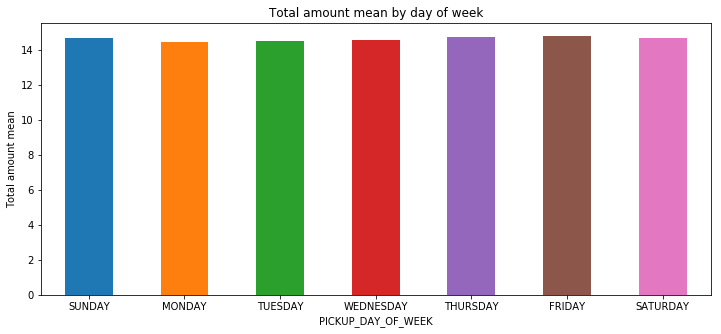

In [30]:
#mean price by day of week
ax=mergedDf.groupby(['PICKUP_DAY_OF_WEEK']).mean().reindex(['SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY'])['TOTAL_AMOUNT'].plot.bar(figsize=(12, 5),rot=0)
ax.set_title('Total amount mean by day of week')
ax.set_ylabel('Total amount mean')

Text(0, 0.5, 'Total amount mean')

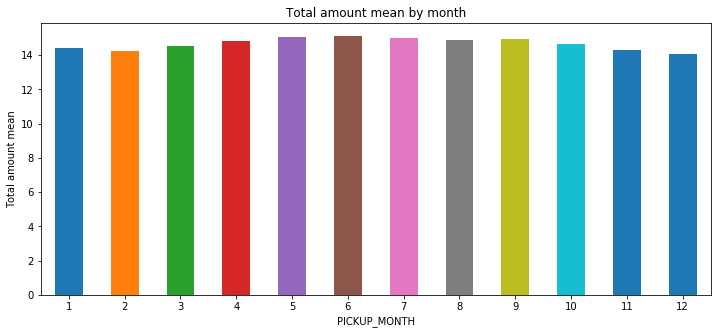

In [31]:
#mean price by month
ax=mergedDf.groupby(['PICKUP_MONTH']).mean()['TOTAL_AMOUNT'].plot.bar(figsize=(12, 5),rot=0)
ax.set_title('Total amount mean by month')
ax.set_ylabel('Total amount mean')

Text(0, 0.5, 'Total amount mean')

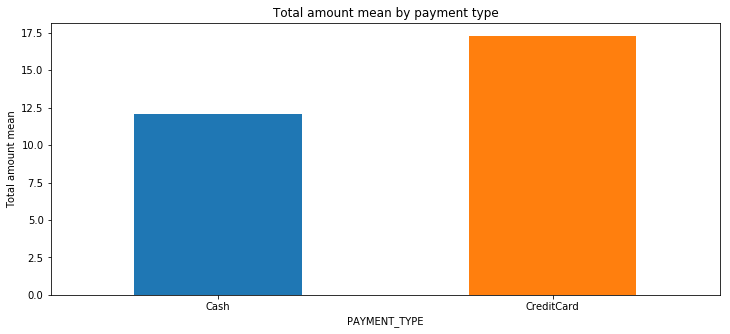

In [32]:
#mean price by pay type
ax=mergedDf.groupby(['PAYMENT_TYPE']).mean()['TOTAL_AMOUNT'].plot.bar(figsize=(12, 5),rot=0)
ax.set_title('Total amount mean by payment type')
ax.set_ylabel('Total amount mean')

Text(0, 0.5, 'Total amount mean')

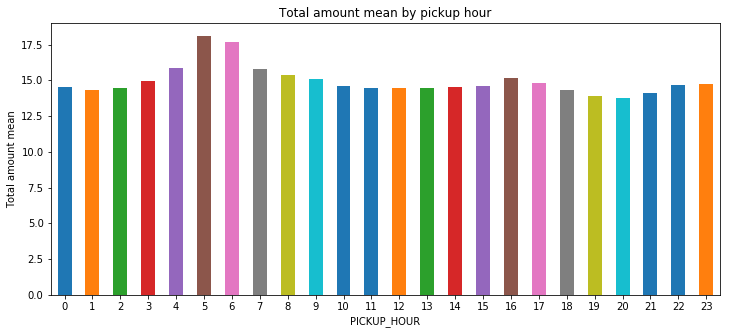

In [33]:
#mean avg by hour
ax=mergedDf.groupby(['PICKUP_HOUR']).mean()['TOTAL_AMOUNT'].plot.bar(figsize=(12, 5),rot=0)
ax.set_title('Total amount mean by pickup hour')
ax.set_ylabel('Total amount mean')

Text(0, 0.5, 'Distance mean')

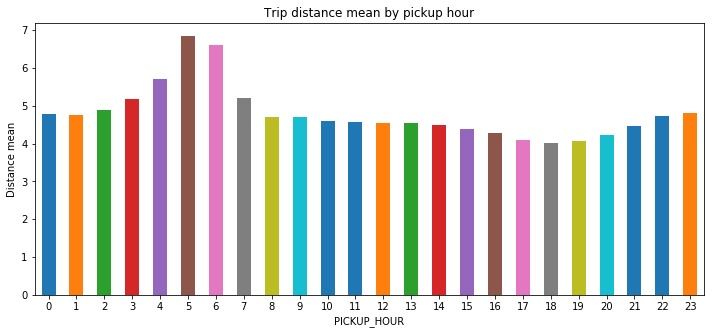

In [34]:
ax=mergedDf.groupby(['PICKUP_HOUR']).mean()['TRIP_DISTANCE'].plot.bar(figsize=(12, 5),rot=0)
ax.set_title('Trip distance mean by pickup hour')
ax.set_ylabel('Distance mean')

Text(0, 0.5, 'Total amount mean')

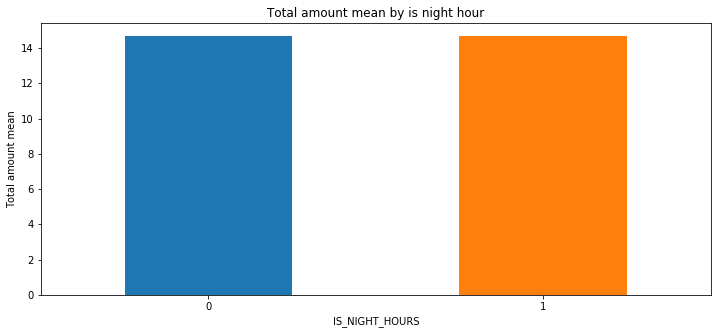

In [35]:
ax=mergedDf.groupby(['IS_NIGHT_HOURS']).mean()['TOTAL_AMOUNT'].plot.bar(figsize=(12, 5),rot=0)
ax.set_title('Total amount mean by is night hour')
ax.set_ylabel('Total amount mean')

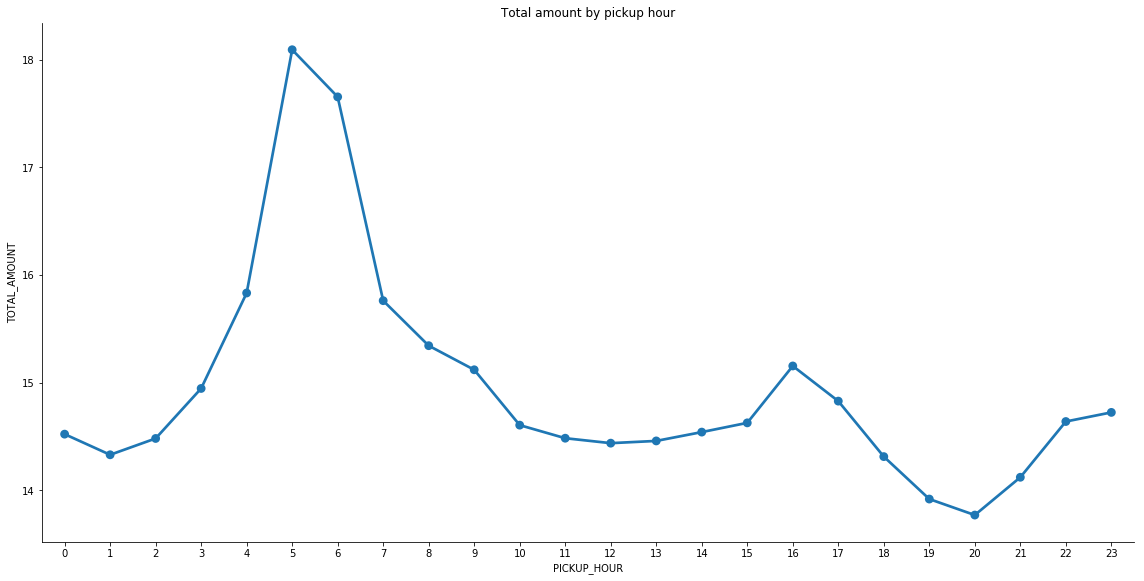

In [36]:

sns.factorplot('PICKUP_HOUR', 
                  'TOTAL_AMOUNT',  
                    estimator = np.mean, 
                    data = mergedDf, 
                   size = 8, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title("Total amount by pickup hour")
plt.show()

Text(0.5, 1.0, 'Distance by pickup hour')

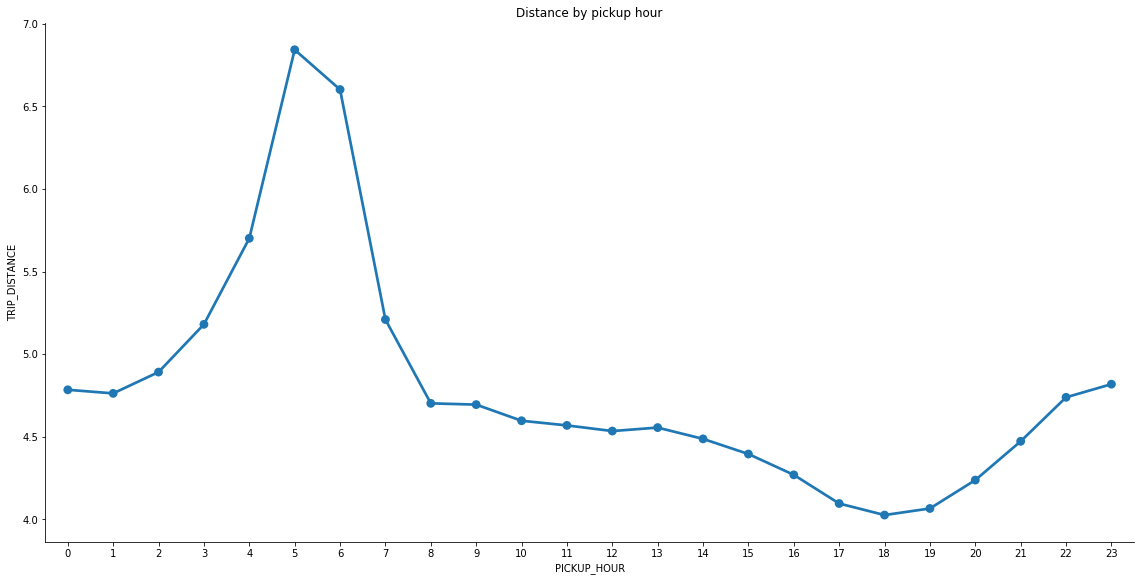

In [37]:
sns.factorplot('PICKUP_HOUR', 
                  'TRIP_DISTANCE',  
                    estimator = np.mean, 
                    data = mergedDf, 
                   size = 8, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title("Distance by pickup hour")


Text(0.5, 1.0, 'Total amount by passenger count')

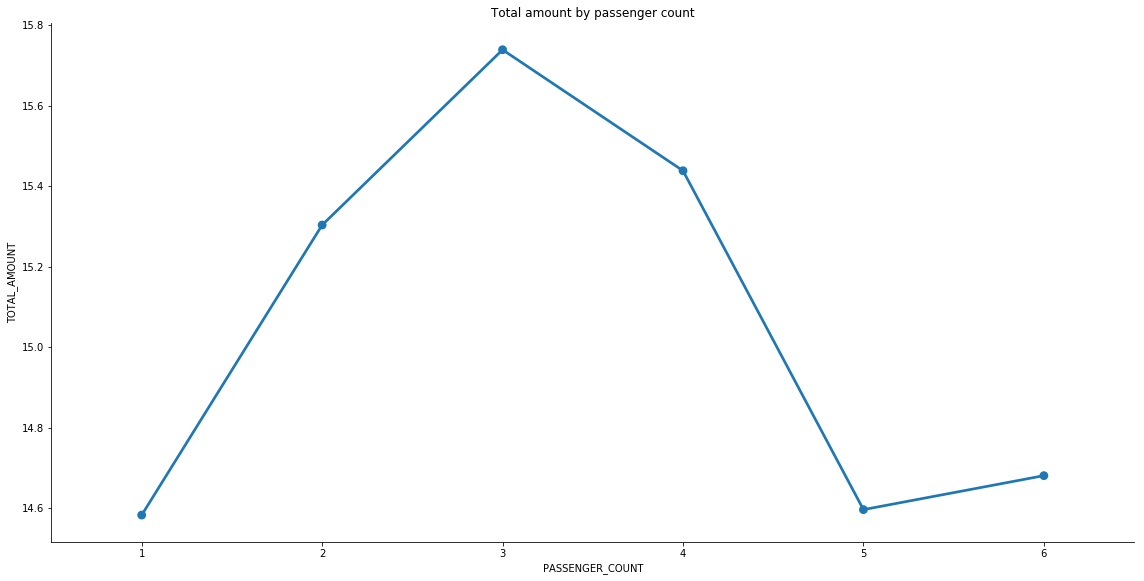

In [38]:
sns.factorplot('PASSENGER_COUNT', 
                  'TOTAL_AMOUNT', 
                    estimator = np.mean, 
                    data = mergedDf, 
                   size = 8, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title("Total amount by passenger count")


Text(0.5, 1.0, 'Total amount vs pickup hour by weather')

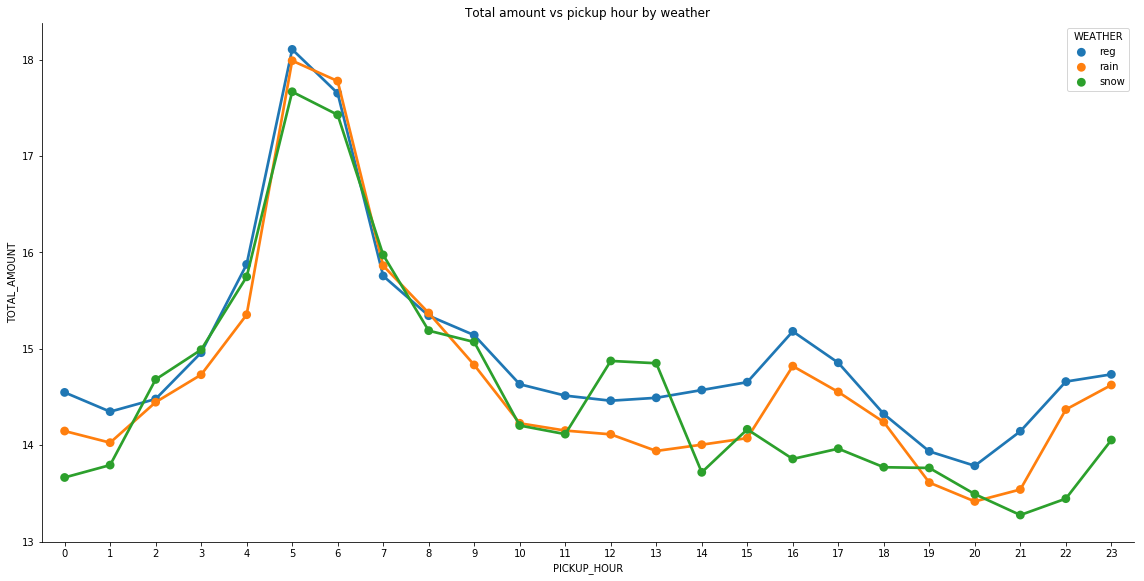

In [39]:
sns.factorplot('PICKUP_HOUR', 
                 'TOTAL_AMOUNT', 
                   hue = 'WEATHER', 
                  estimator = np.mean, 
                   data = mergedDf, 
                   size = 8, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title("Total amount vs pickup hour by weather")


Text(0.5, 1.0, 'Total amount vs pickup month by day of week')

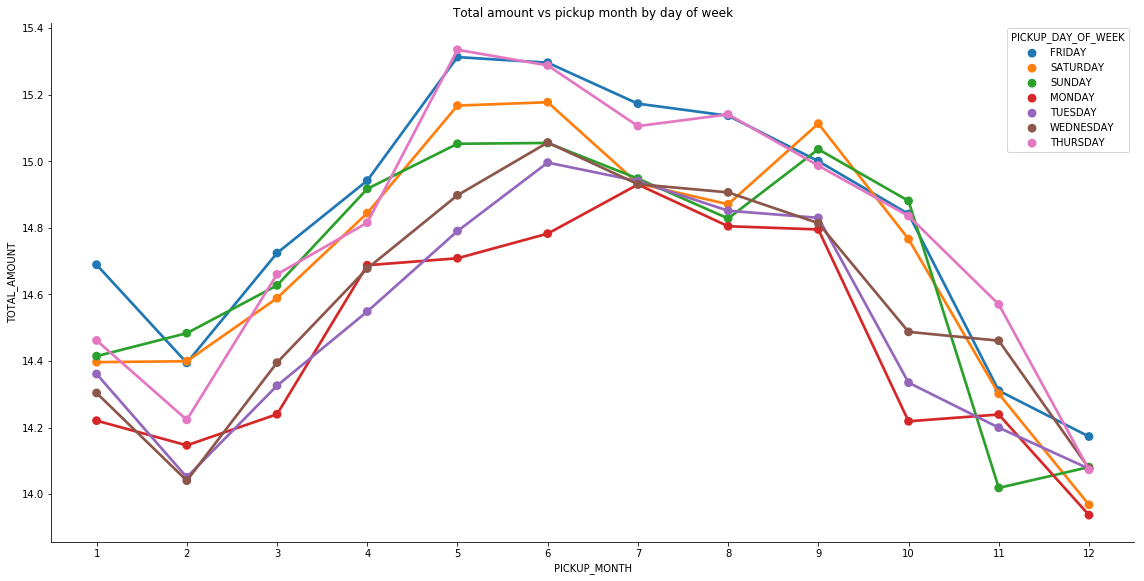

In [40]:
sns.factorplot('PICKUP_MONTH', 
                 'TOTAL_AMOUNT', 
                   hue = 'PICKUP_DAY_OF_WEEK', 
                  estimator = np.mean, 
                   data = mergedDf, 
                   size = 8, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title("Total amount vs pickup month by day of week")


In [41]:
print("Distance mean by ratecode")
mergedDf.groupby(['RATECODE_ID'])['TRIP_DISTANCE'].mean()

Distance mean by ratecode


RATECODE_ID
JFK                    22.677077
NassauOrWestchester    24.756128
NegotiatedFare          6.998320
NewWark                24.434593
StandardRate            4.474841
Name: TRIP_DISTANCE, dtype: float64

(0, 30)

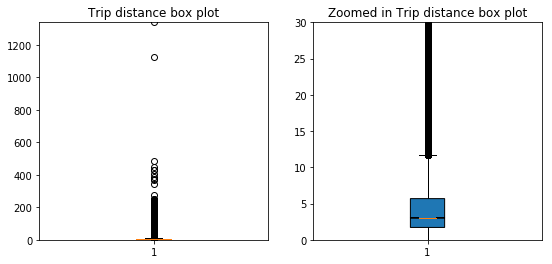

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot1 = axes[0].boxplot(mergedDf.TRIP_DISTANCE,
                          vert=True,  
                          patch_artist=True)   
axes[0].set_ylim(0, mergedDf.TRIP_DISTANCE.max())
axes[0].set_title("Trip distance box plot")
bplot2 = axes[1].boxplot(mergedDf.TRIP_DISTANCE,
                         notch=True, 
                         vert=True,  
                          patch_artist=True)  
axes[1].set_title("Zoomed in Trip distance box plot")

axes[1].set_ylim(0, 30)

In [43]:
mergedDf= mergedDf[mergedDf["TRIP_DISTANCE"]<30]

In [44]:
print("Trip minutes mean by ratecode")
mergedDf.groupby(['RATECODE_ID'])['TRIP_MINUTES'].mean()

Trip minutes mean by ratecode


RATECODE_ID
JFK                    37.222643
NassauOrWestchester    37.695213
NegotiatedFare         29.798486
NewWark                36.176476
StandardRate           21.724110
Name: TRIP_MINUTES, dtype: float64

(0, 80)

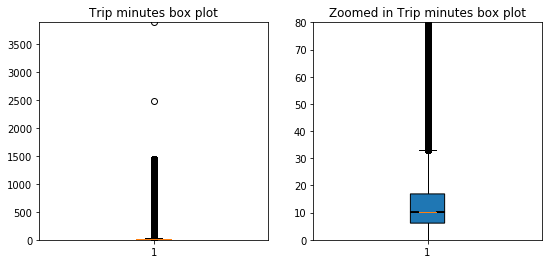

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot1 = axes[0].boxplot(mergedDf.TRIP_MINUTES,
                          vert=True,  
                          patch_artist=True)  
axes[0].set_ylim(0, mergedDf.TRIP_MINUTES.max())
axes[0].set_title("Trip minutes box plot")
bplot2 = axes[1].boxplot(mergedDf.TRIP_MINUTES,
                         notch=True, 
                         vert=True,  
                          patch_artist=True)  
axes[1].set_title("Zoomed in Trip minutes box plot")

axes[1].set_ylim(0, 80)

In [46]:
mergedDf= mergedDf[mergedDf["TRIP_MINUTES"]<80]

In [47]:
print("Total amount mean by ratecode")
mergedDf.groupby(['RATECODE_ID'])['TOTAL_AMOUNT'].mean()

Total amount mean by ratecode


RATECODE_ID
JFK                    61.558292
NassauOrWestchester    46.742647
NegotiatedFare         20.078348
NewWark                58.168370
StandardRate           14.226266
Name: TOTAL_AMOUNT, dtype: float64

(0, 70)

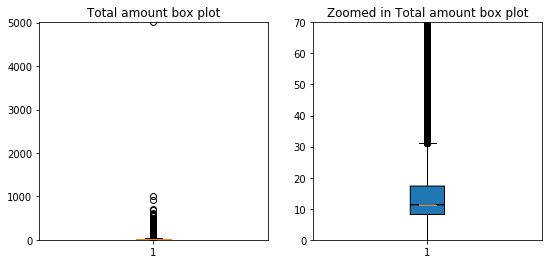

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot1 = axes[0].boxplot(mergedDf.TOTAL_AMOUNT,
                          vert=True,   
                          patch_artist=True)   
axes[0].set_ylim(0, mergedDf.TOTAL_AMOUNT.max())
axes[0].set_title("Total amount box plot")
bplot2 = axes[1].boxplot(mergedDf.TOTAL_AMOUNT,
                         notch=True,  
                         vert=True,   
                          patch_artist=True)   
axes[1].set_title("Zoomed in Total amount box plot")

axes[1].set_ylim(0, 70)

In [49]:
mergedDf= mergedDf[mergedDf["TOTAL_AMOUNT"]<70]

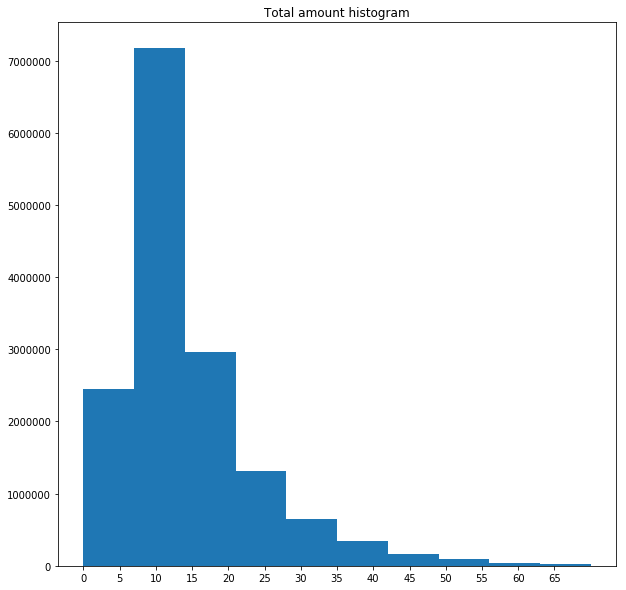

In [50]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.hist(mergedDf.TOTAL_AMOUNT,range=(0, 70))
#ax.set_xlim(np.arange(0, 60, step=10))
ax.set_xticks(np.arange(0, 70, step=5))
ax.set_title("Total amount histogram")

plt.show()

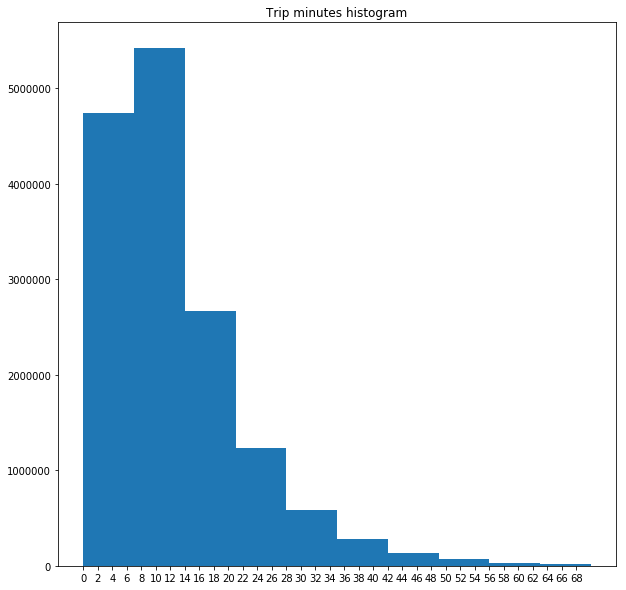

In [51]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.hist(mergedDf.TRIP_MINUTES,range=(0, 70))
ax.set_xticks(np.arange(0, 70, step=2))
ax.set_title("Trip minutes histogram")
plt.show()

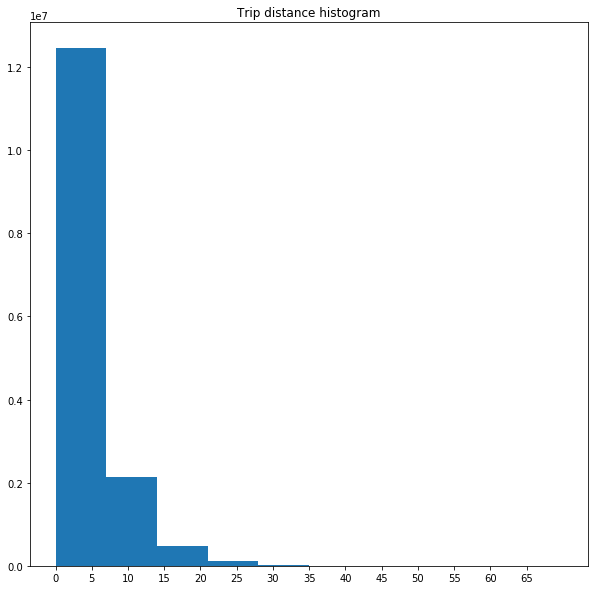

In [52]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.hist(mergedDf.TRIP_DISTANCE,range=(0, 70))
ax.set_xticks(np.arange(0, 70, step=5))
ax.set_title("Trip distance histogram")
plt.show()

Text(0.5, 1.0, 'Trip distance vs Trip minutes by weather')

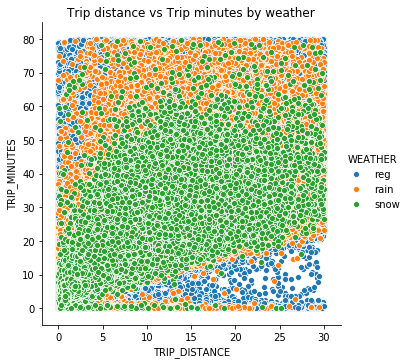

In [53]:
#move down
sns.pairplot(x_vars=['TRIP_DISTANCE'], y_vars=['TRIP_MINUTES'], data=mergedDf, hue ="WEATHER", size=5)
plt.title("Trip distance vs Trip minutes by weather")


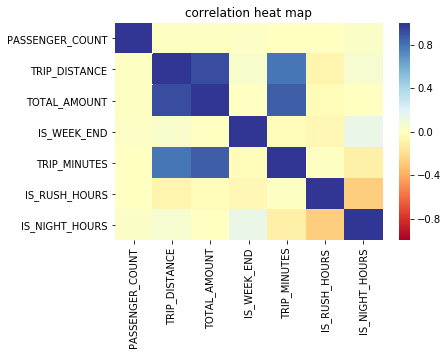

In [54]:
features=['PASSENGER_COUNT', 'TRIP_DISTANCE',
       'TOTAL_AMOUNT', 
       'IS_WEEK_END', 'TRIP_MINUTES', 'IS_RUSH_HOURS', 'IS_NIGHT_HOURS',
      ]
sns.set_style()
corr = mergedDf[features].corr()
sns.heatmap(corr,cmap="RdYlBu",vmin=-1,vmax=1)
plt.title("correlation heat map")
plt.show()

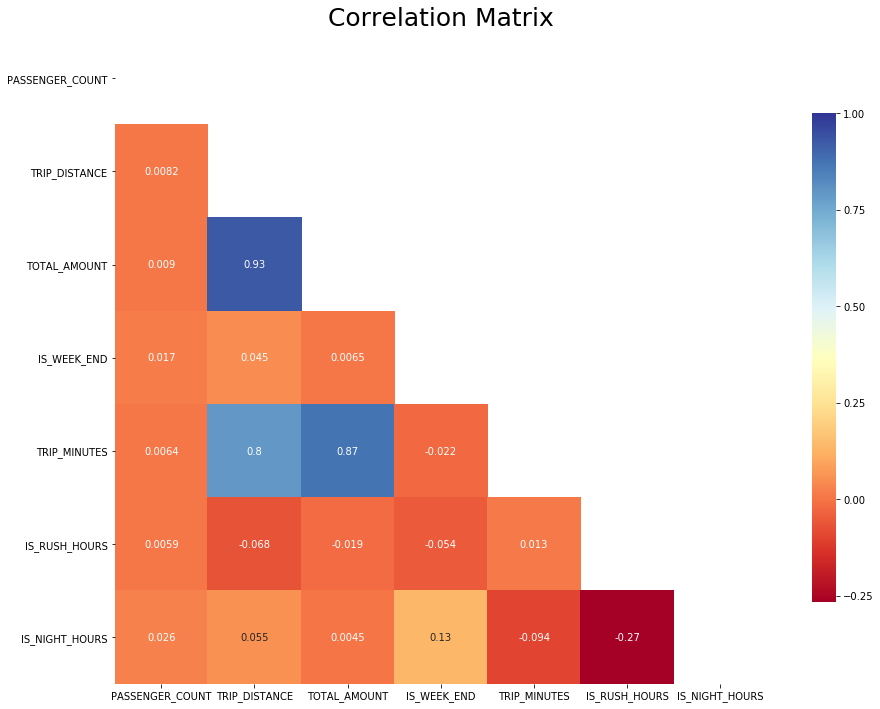

In [55]:
features=['PASSENGER_COUNT', 'TRIP_DISTANCE',
       'TOTAL_AMOUNT', 
       'IS_WEEK_END', 'TRIP_MINUTES', 'IS_RUSH_HOURS', 'IS_NIGHT_HOURS',
      ]
mask = np.zeros_like(mergedDf[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=25)

sns.heatmap(mergedDf[features].corr(),vmax=1.0,square=True,cmap="RdYlBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})

# Creating dummy variables

In [56]:
mergedDf_dummies=pd.get_dummies(mergedDf,columns=['WEATHER','PASSENGER_COUNT'])

In [57]:
mergedDf_dummies=pd.get_dummies(mergedDf_dummies,columns=['TRIP_TYPE','PAYMENT_TYPE'], drop_first=True)


In [58]:
mergedDf_dummies.head()

,RATECODE_ID,TRIP_DISTANCE,TIP_AMOUNT,TOTAL_AMOUNT,PICKUP_MONTH,PICKUP_DAY_OF_MONTH,PICKUP_HOUR,PICKUP_DAY_OF_WEEK,IS_AIRPORT_TRIP,IS_WEEK_END,...,WEATHER_reg,WEATHER_snow,PASSENGER_COUNT_1,PASSENGER_COUNT_2,PASSENGER_COUNT_3,PASSENGER_COUNT_4,PASSENGER_COUNT_5,PASSENGER_COUNT_6,TRIP_TYPE_StreetHail,PAYMENT_TYPE_CreditCard
0,StandardRate,2.349642,1.86,11.16,1,1,0,FRIDAY,0,0,...,1,0,1,0,0,0,0,0,1,1
1,StandardRate,5.729265,0.00,16.80,1,1,0,FRIDAY,0,0,...,1,0,1,0,0,0,0,0,1,0
2,StandardRate,6.099414,4.45,22.25,1,1,0,FRIDAY,0,0,...,1,0,1,0,0,0,0,0,1,1
3,StandardRate,4.844125,0.00,14.80,1,1,0,FRIDAY,0,0,...,1,0,1,0,0,0,0,0,1,0
4,StandardRate,4.103827,0.00,13.30,1,1,0,FRIDAY,0,0,...,1,0,1,0,0,0,0,0,1,0


In [59]:
mergedDf_dummies = mergedDf_dummies.rename(columns={'WEATHER_reg': 'REG_WEATHER','WEATHER_rain': 'RAIN_WEATHER','WEATHER_snow': 'SNOW_WEATHER','TRIP_TYPE_StreetHail': 'IS_STREETHAIL','PAYMENT_TYPE_CreditCard': 'IS_CREDIT'})

In [60]:
mergedDf_dummies.to_csv("mergedDf_dummies.csv",index=False)

In [61]:
mergedDf_dummies.columns

Index(['RATECODE_ID', 'TRIP_DISTANCE', 'TIP_AMOUNT', 'TOTAL_AMOUNT',
       'PICKUP_MONTH', 'PICKUP_DAY_OF_MONTH', 'PICKUP_HOUR',
       'PICKUP_DAY_OF_WEEK', 'IS_AIRPORT_TRIP', 'IS_WEEK_END', 'TRIP_MINUTES',
       'IS_RUSH_HOURS', 'IS_NIGHT_HOURS', 'DID_GAVE_TIP', 'TIP_PCT',
       'RAIN_WEATHER', 'REG_WEATHER', 'SNOW_WEATHER', 'PASSENGER_COUNT_1',
       'PASSENGER_COUNT_2', 'PASSENGER_COUNT_3', 'PASSENGER_COUNT_4',
       'PASSENGER_COUNT_5', 'PASSENGER_COUNT_6', 'IS_STREETHAIL', 'IS_CREDIT'],
      dtype='object')

# Regression -predict taxi fare amount

## Split data to Train, Test & Validation sets

Spliting data:
80 % -train test
10%-valid test
10%-test test

In [62]:
X = mergedDf_dummies.drop("TOTAL_AMOUNT",axis=1)
y = mergedDf_dummies["TOTAL_AMOUNT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=100)

In [63]:
print("train df size="+str(len(X_train))+", valid df size="+ str(len(X_valid))+", test df size="+str(len(X_test))+ ", full df size="+ str(len(mergedDf_dummies)))

train df size=12160856, valid df size=1520107, test df size=1520107, full df size=15201070


## sanity check between full data to train set

#### verifing Distribution for some columns is simillar across full data and training

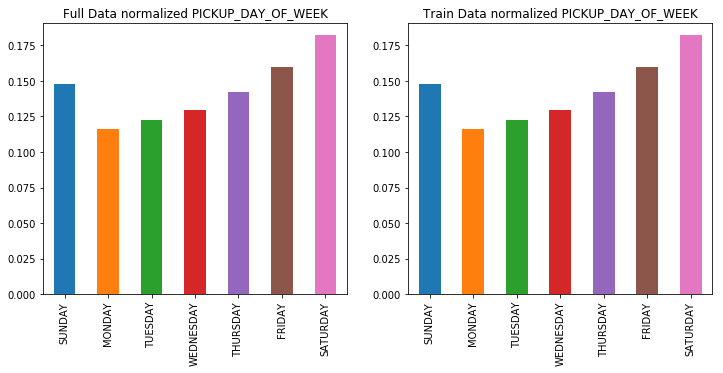

In [64]:
plt.subplot(1, 2, 1)
plt.title("Full Data normalized PICKUP_DAY_OF_WEEK")

pd.value_counts(mergedDf_dummies['PICKUP_DAY_OF_WEEK'].values,normalize=True).reindex(['SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY']).plot.bar(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.title("Train Data normalized PICKUP_DAY_OF_WEEK")

pd.value_counts(X_train['PICKUP_DAY_OF_WEEK'].values,normalize=True).reindex(['SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY']).plot.bar(figsize=(12, 5))


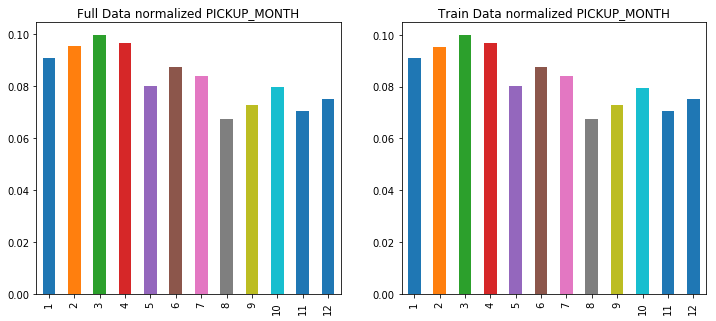

In [65]:
plt.subplot(1, 2, 1)
plt.title("Full Data normalized PICKUP_MONTH")

pd.value_counts(mergedDf_dummies['PICKUP_MONTH'].values,normalize=True).reindex(index = range(1,13)).plot.bar(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.title("Train Data normalized PICKUP_MONTH")

pd.value_counts(X_train['PICKUP_MONTH'].values,normalize=True).reindex(index = range(1,13)).plot.bar(figsize=(12, 5))



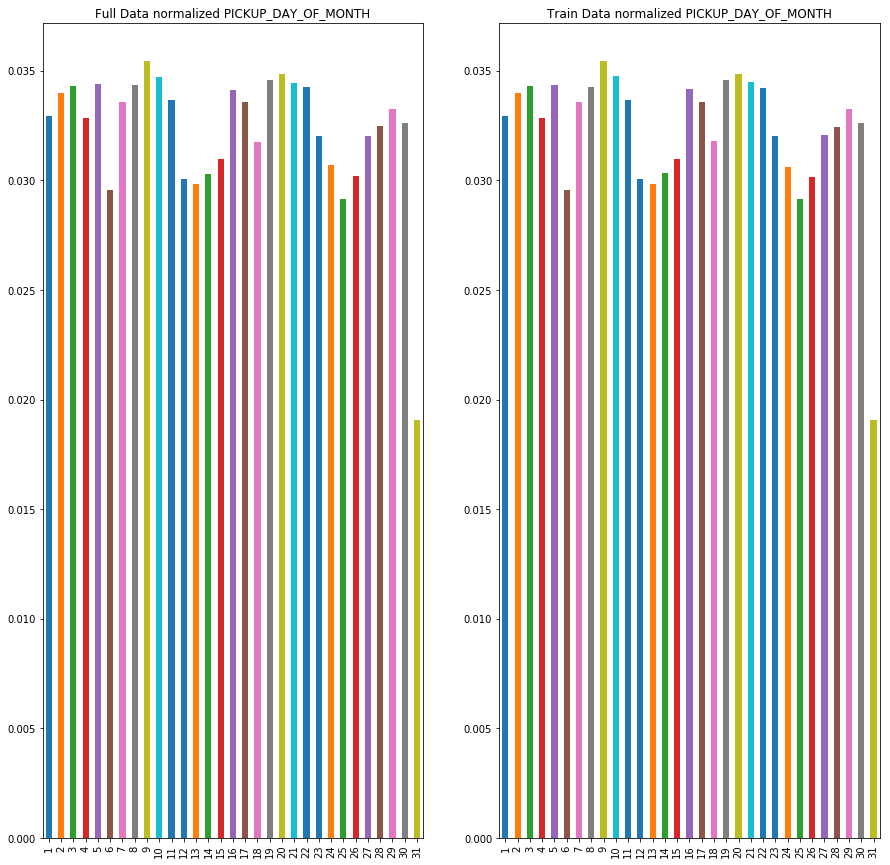

In [66]:
plt.subplot(1, 2, 1)
plt.title("Full Data normalized PICKUP_DAY_OF_MONTH")

pd.value_counts(mergedDf_dummies['PICKUP_DAY_OF_MONTH'].values,normalize=True).reindex(index = range(1,32)).plot.bar(figsize=(15,15))
plt.subplot(1, 2,2)
plt.title("Train Data normalized PICKUP_DAY_OF_MONTH")

pd.value_counts(X_train['PICKUP_DAY_OF_MONTH'].values,normalize=True).reindex(index = range(1,32)).plot.bar(figsize=(15,15))


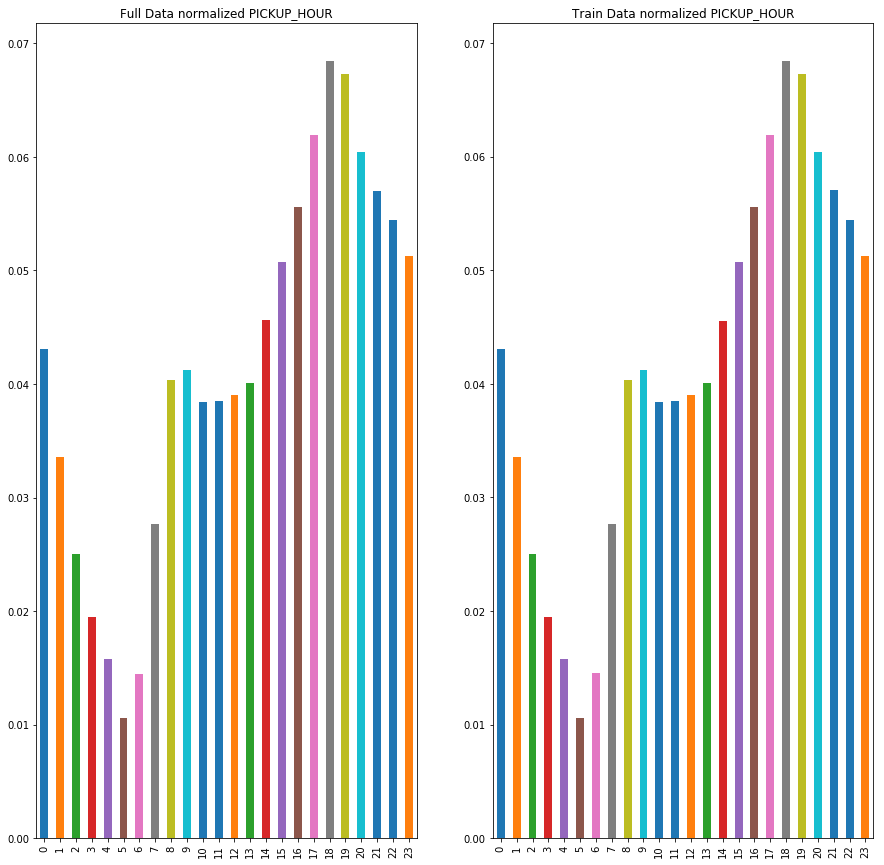

In [67]:
plt.subplot(1, 2, 1)
plt.title("Full Data normalized PICKUP_HOUR")

pd.value_counts(mergedDf_dummies['PICKUP_HOUR'].values,normalize=True).reindex(index = range(0,24)).plot.bar(figsize=(15,15))

plt.subplot(1, 2, 2)
plt.title("Train Data normalized PICKUP_HOUR")

pd.value_counts(X_train['PICKUP_HOUR'].values,normalize=True).reindex(index = range(0,24)).plot.bar(figsize=(15,15))



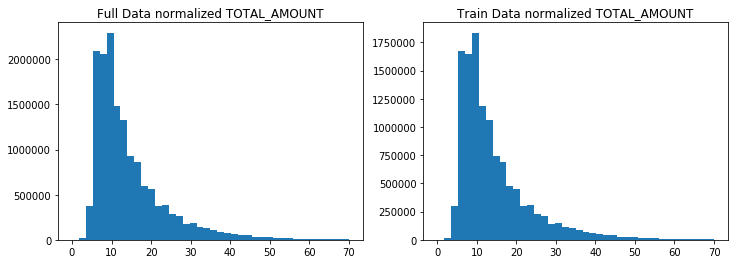

In [68]:

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.title("Full Data normalized TOTAL_AMOUNT")

plt.hist(y,bins=40);
plt.subplot(1, 2, 2)
plt.title("Train Data normalized TOTAL_AMOUNT")

plt.hist(y_train,bins=40);

## Train the model + Cross validation


1. We will create all posible  combinations from all features (a dummy variable will or be fully in a model or will not be at all- for example 'WEATHER_DUMMY_rain','WEATHER_DUMMY_reg', 'WEATHER_DUMMY_snow' will be together in a model or both will not be at all)
2. For each combination of features we will run linear regression algorithm , train on the train set and validate scores on the valid set.
3. We will look on the best scores and choose the feautres of the best model
4. We will run RandomForestRegressor, with the features selected and see if it improves our results
5. We will use grid search for chosen algorithm for choosing best params

In [69]:
mergedDf_dummies= pd.read_csv('mergedDf_dummies.csv')


In [70]:
modelInput=[['TRIP_DISTANCE'],
           ['IS_WEEK_END'], 
           ['TRIP_MINUTES'],
           ['IS_RUSH_HOURS'],
           ['IS_NIGHT_HOURS'],
            ['IS_AIRPORT_TRIP'],
           ['REG_WEATHER','RAIN_WEATHER', 'SNOW_WEATHER'],
           ['PASSENGER_COUNT_1','PASSENGER_COUNT_2', 'PASSENGER_COUNT_3','PASSENGER_COUNT_4', 'PASSENGER_COUNT_5','PASSENGER_COUNT_6'], 
           ['IS_STREETHAIL'],
           ['IS_CREDIT']]

In [71]:
#function that gets a list->returns all cobinations of list (example: for [1,2,3] will return 1,2,3,[1,3],[1,2],[2,3],[1,2,3])
def sublists(input):
    for length in range(1,len(input) + 1):
        yield from combinations(input, length)
#apply function on all features
modelsFeatures=list(sublists(modelInput))

In [72]:
#creating data frame the will contain scores per each model
summaryDf = pd.DataFrame(columns=['ModelColumns','MAE','MSE','RMSE','RSQUARE'])


In [73]:
#For each model we will train on the train set and validate scores on the valid set and add to dummary data frame.
for current_features in modelsFeatures:
    modelFeatures=[item for sublist in current_features for item in sublist]
    lm = LinearRegression()
    model_X_train=X_train[modelFeatures]
    lm.fit(model_X_train,y_train)
    model_X_valid=X_valid[modelFeatures]
    predictions_valid_set = lm.predict(model_X_valid)

    
    MAE=metrics.mean_absolute_error(y_valid, predictions_valid_set)
    MSE=metrics.mean_squared_error(y_valid, predictions_valid_set)
    RMSE=np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid_set))
    RSQUARED=metrics.explained_variance_score(y_valid, predictions_valid_set)

    summaryDf = summaryDf.append({'ModelColumns':','.join(modelFeatures),'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSQUARE':RSQUARED}, ignore_index=True)


In [74]:
print("Number of models compared")
print(summaryDf.shape[0])

Number of models compared
1023


### looking at 10 best scores by RMSE


In [75]:
summaryDf.sort_values(by='RMSE').head(10)


,ModelColumns,MAE,MSE,RMSE,RSQUARE
1022,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.139910,5.622620,2.371206,0.934551
1015,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.140013,5.623046,2.371296,0.934546
1014,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.139721,5.623486,2.371389,0.934541
972,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.139824,5.623911,2.371479,0.934536
1017,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.144849,5.632849,2.373362,0.934432
980,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.144938,5.633245,2.373446,0.934428
979,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.144700,5.633951,2.373594,0.934419
862,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.144788,5.634344,2.373677,0.934415
1013,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.137704,5.634882,2.373791,0.934409
971,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.137803,5.635307,2.373880,0.934404


In [76]:
#adding column to summary df ->number of columns in feature
summaryDf["NUM_FEATURES"]=summaryDf.ModelColumns.apply(lambda x: len(x.split(",")))

In [77]:

summaryDf.sort_values(by='RSQUARE', ascending=False).head()

,ModelColumns,MAE,MSE,RMSE,RSQUARE,NUM_FEATURES
1022,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.139910,5.622620,2.371206,0.934551,17
1015,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.140013,5.623046,2.371296,0.934546,14
1014,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.139721,5.623486,2.371389,0.934541,11
972,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.139824,5.623911,2.371479,0.934536,8
1017,"TRIP_DISTANCE,IS_WEEK_END,TRIP_MINUTES,IS_RUSH...",1.144849,5.632849,2.373362,0.934432,16


In [78]:
print("Number of models with over 0.93 R-square value")
print(summaryDf[summaryDf["RSQUARE"]>0.93].shape[0])


Number of models with over 0.93 R-square value
64


### There are 64 models that give R-square value ~ 0.93
To minimize complexity of model I will choose my model to be the model that is R-square value is greater than 0.93 with minimum features


In [79]:
print("Model with R-square value over 0.93 and minimum features")
chosenModel=summaryDf[summaryDf["RSQUARE"]>0.93].sort_values(by='NUM_FEATURES').head(1).ModelColumns.iloc[0].split(",")
chosenModel

Model with R-square value over 0.93 and minimum features


['TRIP_DISTANCE', 'TRIP_MINUTES', 'IS_AIRPORT_TRIP', 'IS_CREDIT']

#### Selected features:['TRIP_DISTANCE', 'TRIP_MINUTES', 'IS_AIRPORT_TRIP', 'IS_CREDIT']

In [80]:
chosenModel=['TRIP_DISTANCE', 'TRIP_MINUTES', 'IS_AIRPORT_TRIP', 'IS_CREDIT']


### Running LinearRegression on selected features

In [81]:
lm =LinearRegression()
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_valid=X_valid[chosenModel]
predictions_valid_set = lm.predict(model_X_valid)

In [82]:
MAE=metrics.mean_absolute_error(y_valid, predictions_valid_set)
MSE=metrics.mean_squared_error(y_valid, predictions_valid_set)
RMSE=np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid_set))
RSQUARED=metrics.explained_variance_score(y_valid, predictions_valid_set)

In [83]:
print('MAE:', MAE)
print('MSE:',MSE )
print('RMSE:',RMSE )
print('RSQUARED:', RSQUARED)

MAE: 1.16096778027
MSE: 5.69016140445
RMSE: 2.38540592027
RSQUARED: 0.933765062614


In [84]:
print("Model Intercept (initial taxi charge):  ",lm.intercept_)


Model Intercept (initial taxi charge):   2.51652257799


http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml<br>
**"The initial charge is $2.50."**
(Our model predict the initial charge almost perfectly)

In [85]:
coeffecients = pd.DataFrame(lm.coef_,model_X_train.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
TRIP_DISTANCE,1.352595
TRIP_MINUTES,0.356677
IS_AIRPORT_TRIP,25.087372
IS_CREDIT,2.408146


### Running RandomForestRegressor on selected features

In [86]:
lm = RandomForestRegressor(random_state=100)
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_valid=X_valid[chosenModel]
predictions_valid_set = lm.predict(model_X_valid)

In [87]:
MAE=metrics.mean_absolute_error(y_valid, predictions_valid_set)
MSE=metrics.mean_squared_error(y_valid, predictions_valid_set)
RMSE=np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid_set))
RSQUARED=metrics.explained_variance_score(y_valid, predictions_valid_set)

In [88]:
print('MAE:', MAE)
print('MSE:',MSE )
print('RMSE:',RMSE )
print('RSQUARED:', RSQUARED)

MAE: 1.10459084325
MSE: 5.28284776353
RMSE: 2.29844464008
RSQUARED: 0.938506283119


#### RandomForestRegressor gives better results

## Predict

1. Take the chosen model features and extract columns from train set
2. Train the data
3. Predict with the model the test set

In [89]:

lm = RandomForestRegressor(random_state=100)
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_test=X_test[chosenModel]
predictions_test_set = lm.predict(model_X_test)

## Evaluate


In [90]:
MAE=metrics.mean_absolute_error(y_test, predictions_test_set)
MSE=metrics.mean_squared_error(y_test, predictions_test_set)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predictions_test_set))
RSQUARED=metrics.explained_variance_score(y_test, predictions_test_set)

In [91]:
print('MAE:', MAE)
print('MSE:',MSE )
print('RMSE:',RMSE )
print('RSQUARED:', RSQUARED)

MAE: 1.10427869797
MSE: 5.30589005379
RMSE: 2.30345176937
RSQUARED: 0.938003746261


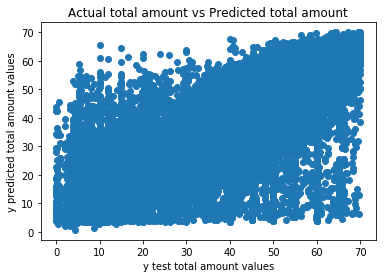

In [92]:
plt.scatter(y_test,predictions_test_set)
plt.xlabel('y test total amount values')
plt.ylabel("y predicted total amount values")
plt.title("Actual total amount vs Predicted total amount")
plt.show()

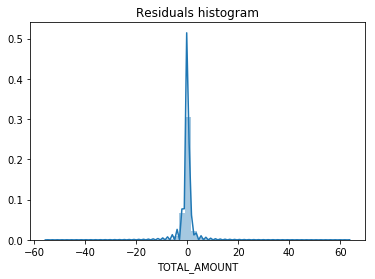

In [93]:
sns.distplot((y_test-predictions_test_set));
plt.title("Residuals histogram")
plt.show()

### The residuals are normally distributed -good indication that the model predicted pretty well for the data